> edit

## import

In [60]:
import itstgcntry
import torch

In [47]:
from torch_geometric_temporal.dataset import EnglandCovidDatasetLoader

In [48]:
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader

In [49]:
from torch_geometric_temporal.dataset import METRLADatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import PedalMeDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import WindmillOutputLargeDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import WindmillOutputMediumDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import WindmillOutputSmallDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import WikiMathsDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import PemsBayDatasetLoader

In [61]:
from torch_geometric_temporal.dataset import MTMDatasetLoader

In [ ]:
from torch_geometric_temporal.dataset import TwitterTennisDatasetLoader

In [78]:
loader = EnglandCovidDatasetLoader()

In [79]:
dataset = loader.get_dataset(lags=1)

In [80]:
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [77]:
torch.tensor(train_dataset.tedge_index.T.tolist()).shape

torch.Size([102, 2])

In [83]:
torch.tensor([train_dataset.edge_indices[j].T.tolist() for j in range(T-1)]).shape

ValueError: expected sequence of length 2158 at dim 1 (got 1743)

# Chickenpox

## iterative thresholded STGCN (IT-STGCN) with random missing

`-` data

In [213]:
loader = ChickenpoxDatasetLoader()

In [214]:
dataset = loader.get_dataset(lags=1)

In [215]:
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [186]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.8)

In [187]:
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand',Datatyp='StaticGraphTemporalSignal_lags')

In [104]:
train_dataset_padded = itstgcntry.padding(train_dataset_miss,Datatyp='StaticGraphTemporalSignal_lags') # padding(train_dataset_miss,method='linear'와 같음)a

`-` 학습

In [105]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [106]:
lrnr.learn(Datatyp='StaticGraphTemporalSignal_lags',filters=4,epoch=5,lr=0.01)

`-` 적합값

In [107]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

- 실행하면 X,y,yhat 출력 

`-` 모형 평가 및 시각화

In [108]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

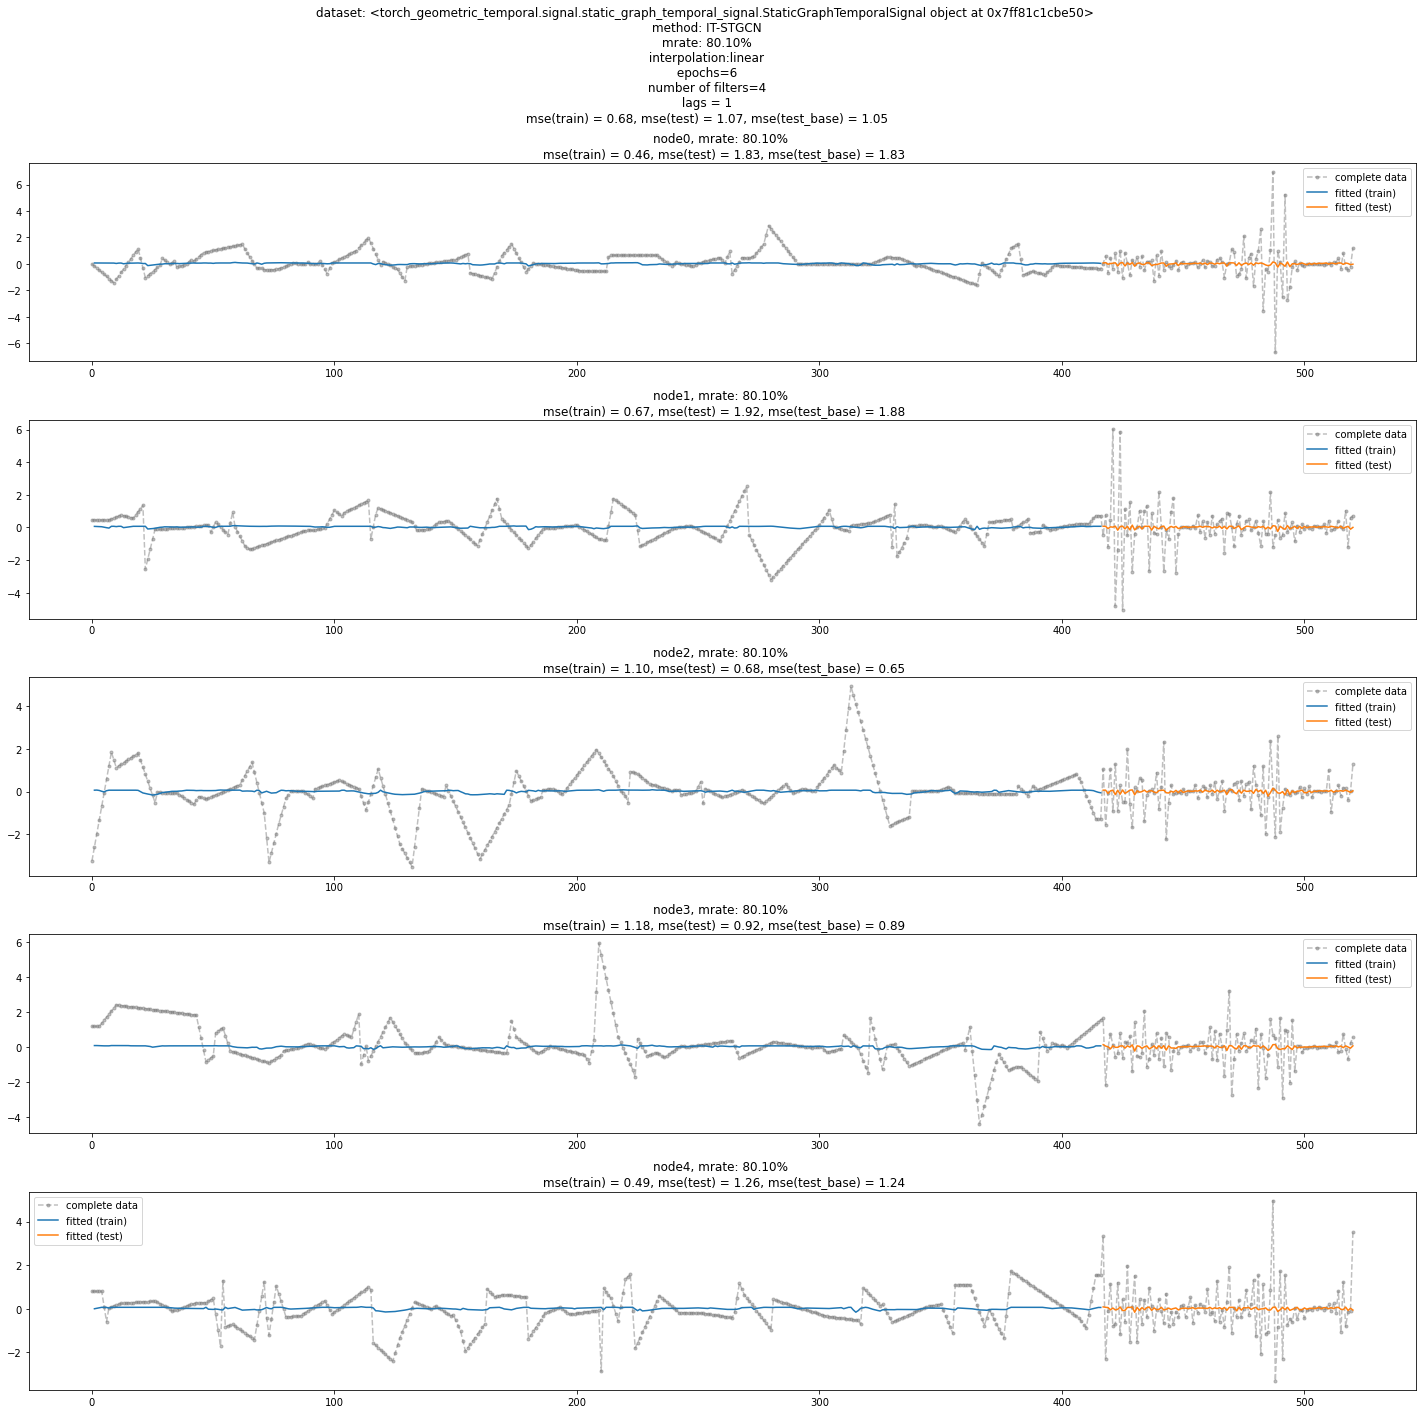

In [109]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(20)
fig.tight_layout()
fig

## iterative thresholded STGCN (IT-STGCN) with block missing

`-` data

In [83]:
loader = ChickenpoxDatasetLoader()

In [84]:
dataset = loader.get_dataset(lags=1)

In [85]:
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [94]:
my_list = [[] for _ in range(20)] #chickenpox
another_list = list(range(100,350))
my_list[1] = another_list
my_list[2] = another_list
my_list[5] = another_list
mindex = my_list

In [95]:
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block',Datatyp='StaticGraphTemporalSignal_lags')

In [96]:
train_dataset_padded = itstgcntry.padding(train_dataset_miss,Datatyp='StaticGraphTemporalSignal_lags') # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [97]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [98]:
lrnr.learn(Datatyp='StaticGraphTemporalSignal_lags',filters=4,epoch=5,lr=0.01)

`-` 적합값

In [99]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

- 실행하면 X,y,yhat 출력 

`-` 모형 평가 및 시각화

In [100]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

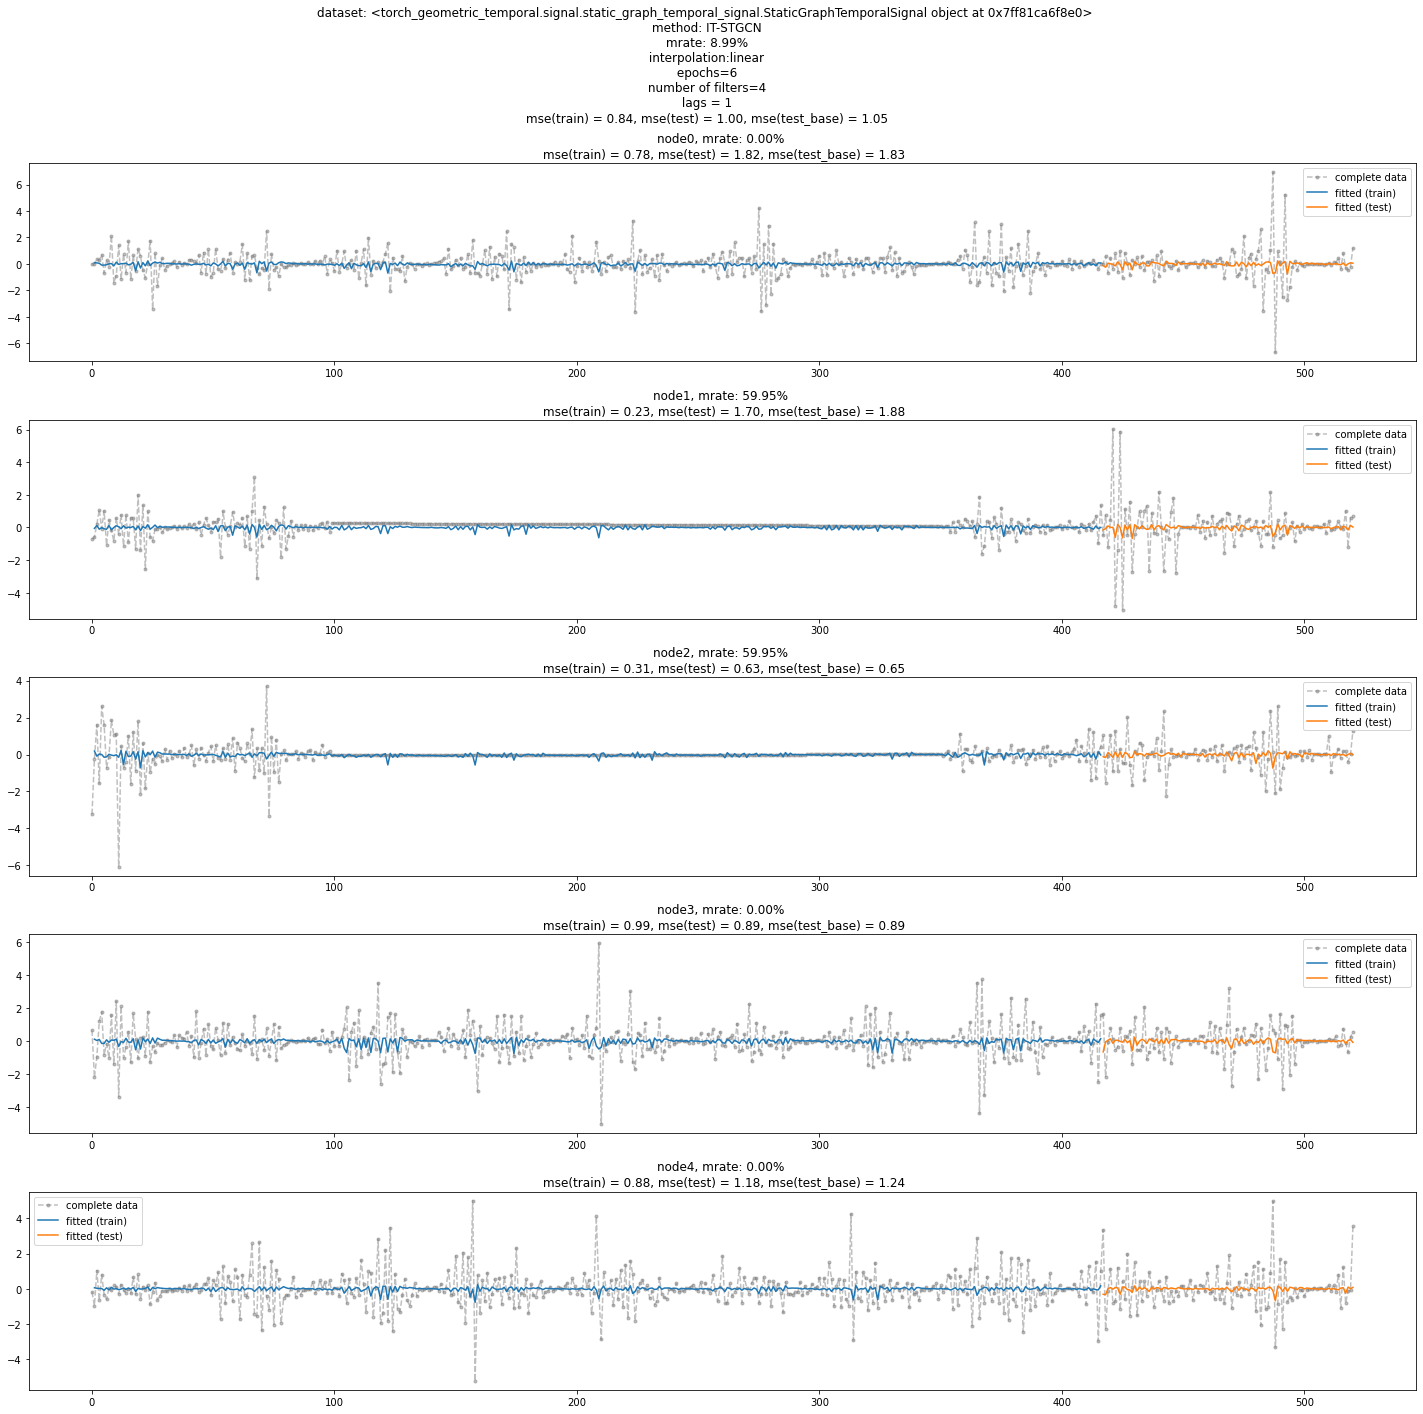

In [101]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(20)
fig.tight_layout()
fig

# MTM

## iterative thresholded STGCN (IT-STGCN) with random missing

`-` data

In [62]:
loader = MTMDatasetLoader()

In [66]:
dataset = loader.get_dataset(frames=1)

In [67]:
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [70]:
torch.tensor(train_dataset[0].x.T).shape

/tmp/ipykernel_10613/1429163519.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(train_dataset[0].x.T).shape


torch.Size([1, 21, 3])

In [69]:
torch.tensor(train_dataset.targets).shape

torch.Size([11574, 1, 6])

In [68]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.8)

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 21 but got size 1 for tensor number 1 in the list.

In [ ]:
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand',Datatyp='StaticGraphTemporalSignal_lags')

In [104]:
train_dataset_padded = itstgcntry.padding(train_dataset_miss,Datatyp='StaticGraphTemporalSignal_lags') # padding(train_dataset_miss,method='linear'와 같음)a

`-` 학습

In [105]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [106]:
lrnr.learn(Datatyp='StaticGraphTemporalSignal_lags',filters=4,epoch=5,lr=0.01)

`-` 적합값

In [107]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

- 실행하면 X,y,yhat 출력 

`-` 모형 평가 및 시각화

In [108]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

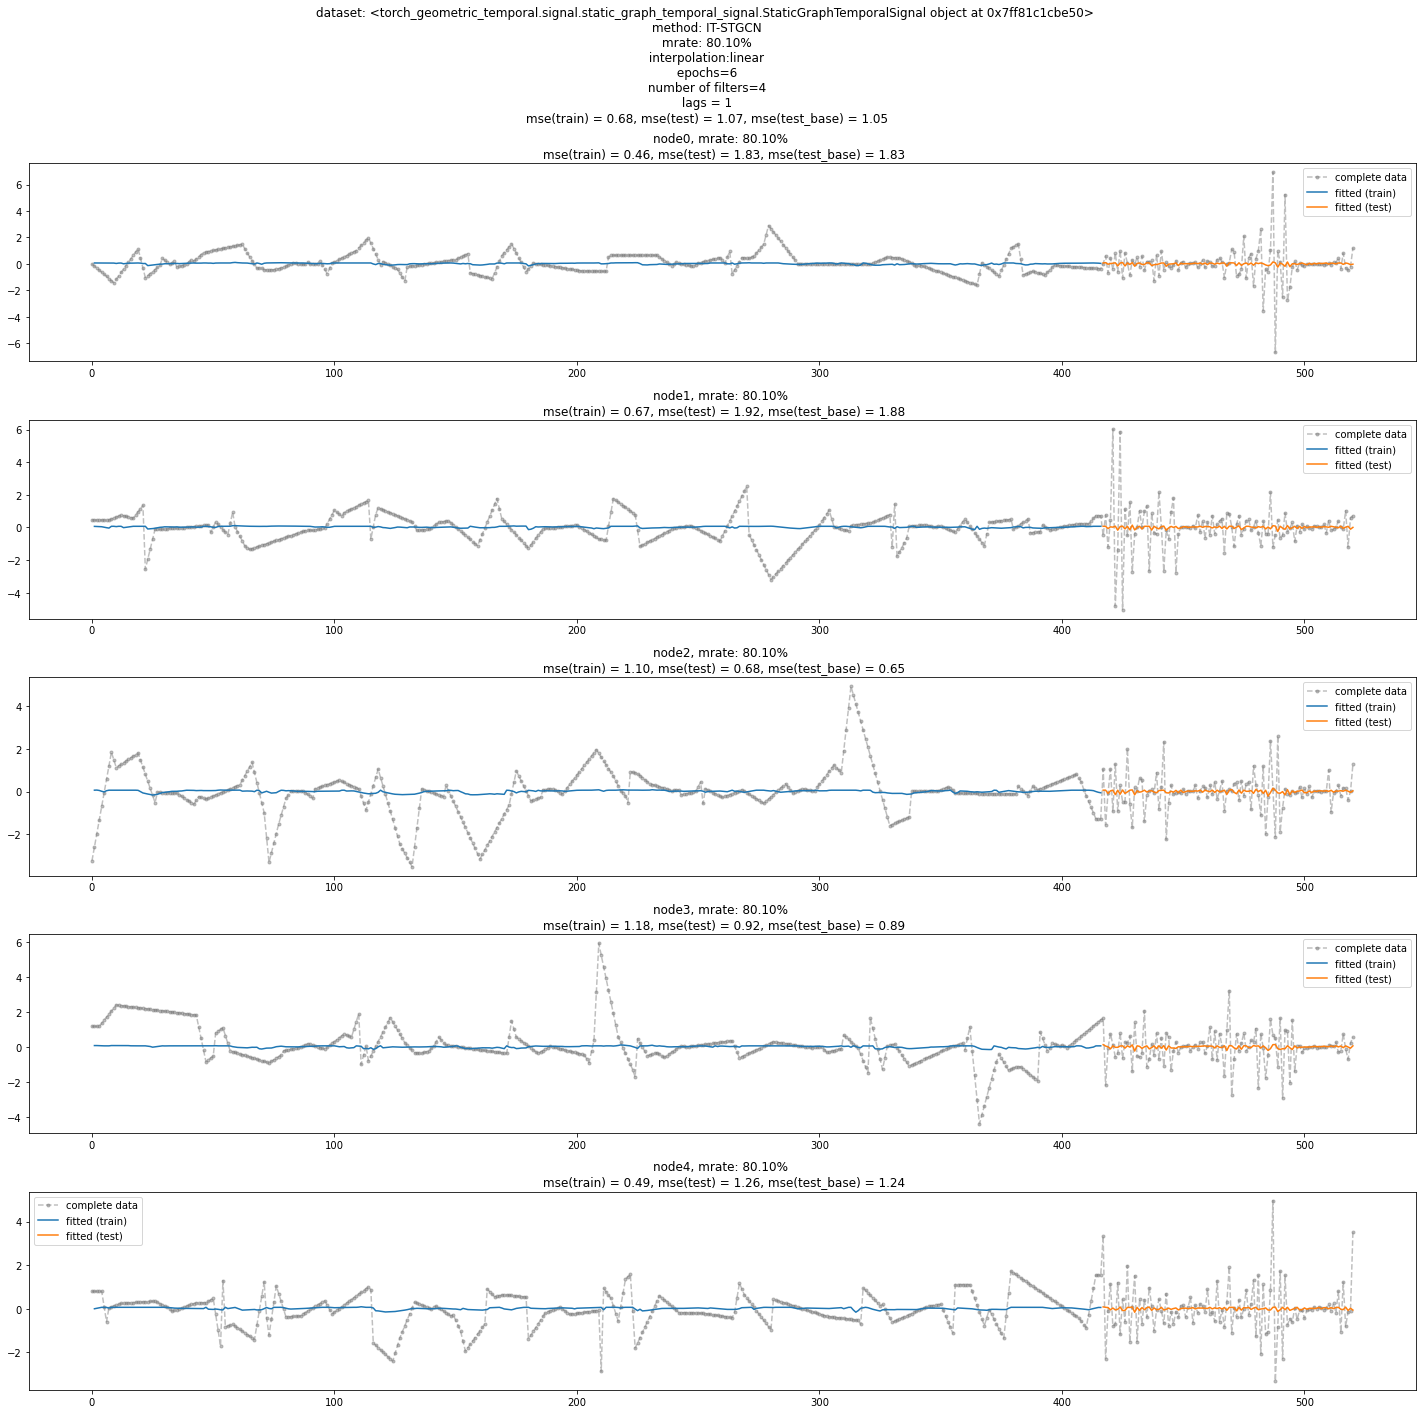

In [109]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(20)
fig.tight_layout()
fig

## iterative thresholded STGCN (IT-STGCN) with block missing

`-` data

In [83]:
loader = ChickenpoxDatasetLoader()

In [84]:
dataset = loader.get_dataset(lags=1)

In [85]:
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [94]:
my_list = [[] for _ in range(20)] #chickenpox
another_list = list(range(100,350))
my_list[1] = another_list
my_list[2] = another_list
my_list[5] = another_list
mindex = my_list

In [95]:
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block',Datatyp='StaticGraphTemporalSignal_lags')

In [96]:
train_dataset_padded = itstgcntry.padding(train_dataset_miss,Datatyp='StaticGraphTemporalSignal_lags') # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [97]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [98]:
lrnr.learn(Datatyp='StaticGraphTemporalSignal_lags',filters=4,epoch=5,lr=0.01)

`-` 적합값

In [99]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

- 실행하면 X,y,yhat 출력 

`-` 모형 평가 및 시각화

In [100]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

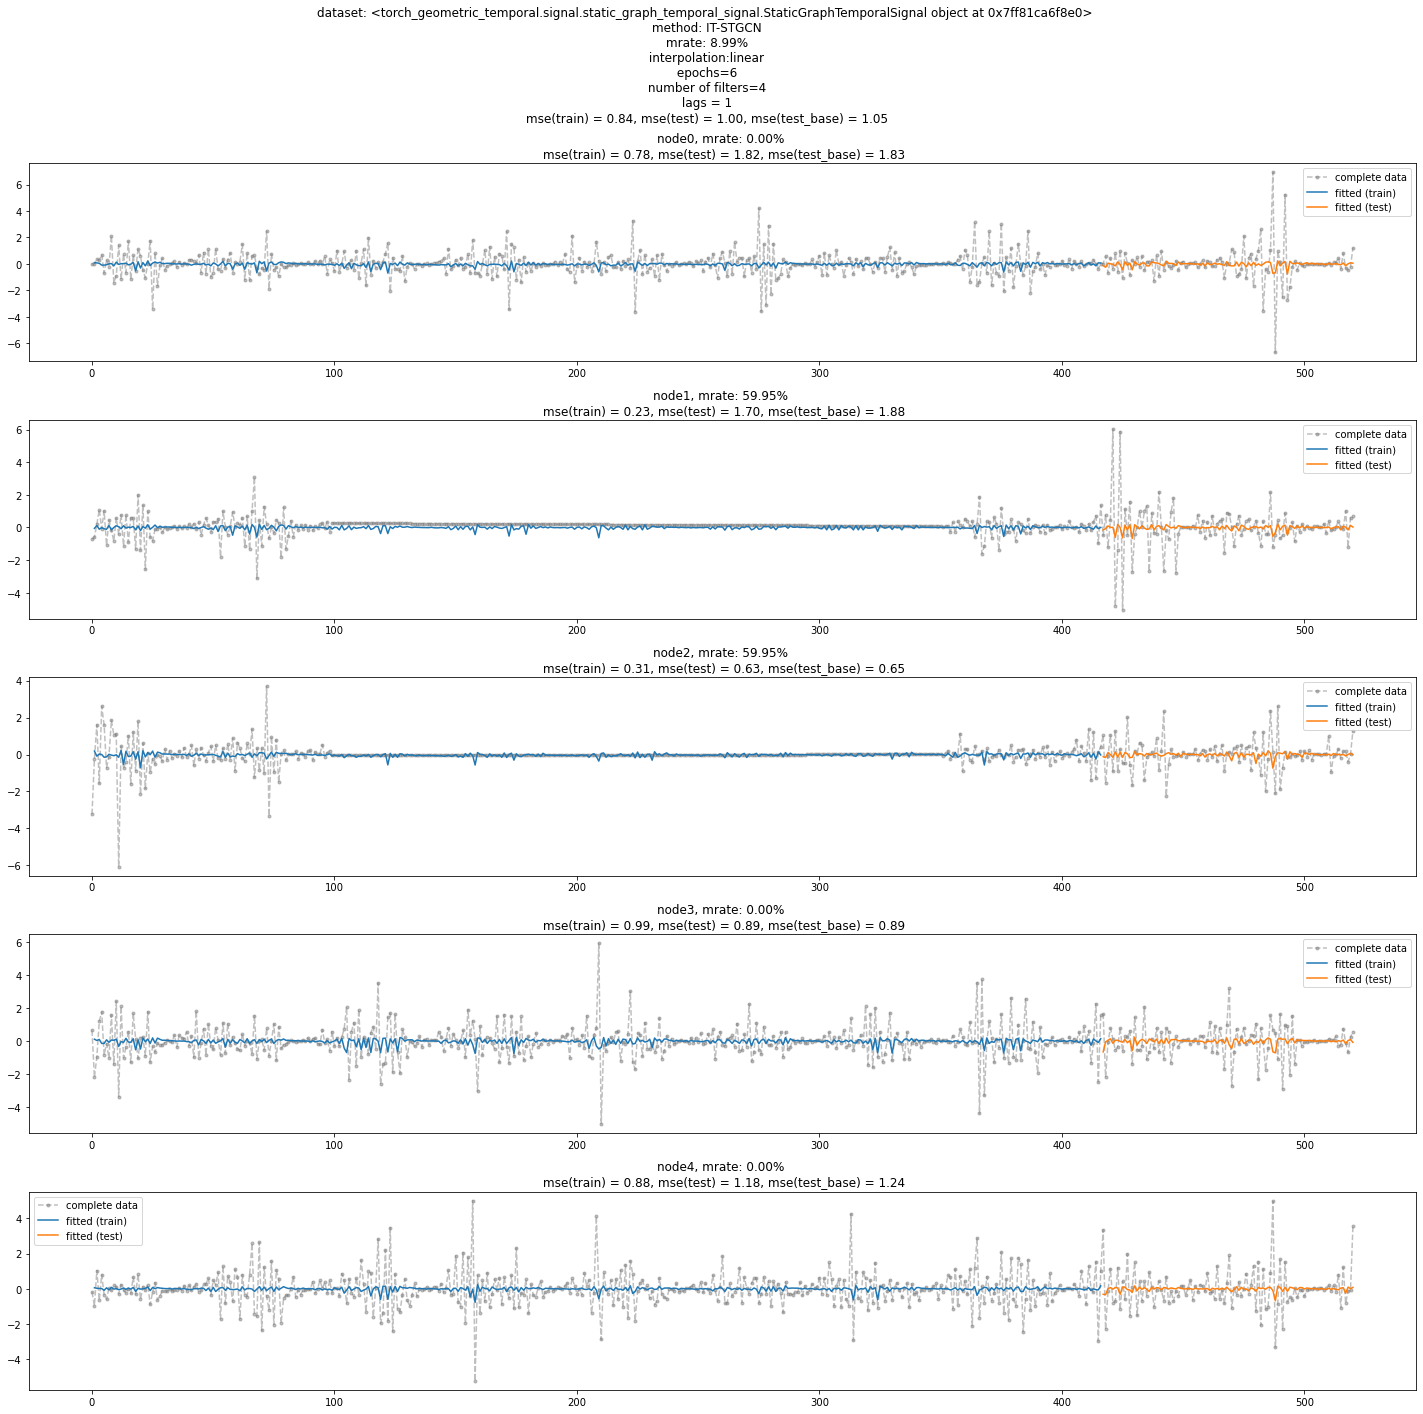

In [101]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(20)
fig.tight_layout()
fig